## Linear Regression on Health Insurance dataset
                                                                                          21227-Akash Bairagi
--------------------------------------------------------

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

#### Loading dataset

In [24]:
data = pd.read_csv("../datasets/Health_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Features :
* `age` - Age of the person
* `sex` - Gender of the person
* `bmi` - Body Mass Index of the person
* `smoker` - If the person smoker
* `region` - SW, SE, NW, NE

Target Feature :
* `Charges` - Insurance Amount


#### Understanding the Data

In [5]:
## Dimension of the dataset
data.shape

(1338, 7)

     - There are 1338 observations with 7 features.

In [5]:
## Data description
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


      - Observing descriptive statistics of the dataset

In [6]:
## Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


        - No Missing Values in the Dataset
        - `sex`,`children`, `region` are categorical.

In [25]:
## Categories of the Categorical features
display(data.nunique())
print('Sex - ',pd.unique(data['sex']))
print('Smoker - ',pd.unique(data['smoker']))
print('Region - ',pd.unique(data['region']))

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Sex -  ['female' 'male']
Smoker -  ['yes' 'no']
Region -  ['southwest' 'southeast' 'northwest' 'northeast']


#### Data Preprocessing

- Encoding `sex`

In [26]:
## Label Encoding
proc_data = data.copy()
proc_data["sex"] = data["sex"].map({"female":0,"male":1}) 
#proc_data["smoker"] = data["smoker"].map({"yes":1,"no":0}) 


* Encoding `region` and `smoker`

In [27]:
## One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
encoder_region = OneHotEncoder().fit(proc_data[['region', 'smoker']])

print(encoder_region.categories_)
proc_data[['northeast', 'northwest', 'southeast', 'southwest','smoker_no', 'smoker_yes']] = encoder_region.transform(proc_data[['region','smoker']]).toarray()


[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object), array(['no', 'yes'], dtype=object)]


In [28]:
## Dropping region column
proc_data.drop(columns=['region','smoker'], inplace=True)

In [29]:
## The Preprocessed dataset
proc_data

,age,sex,bmi,children,charges,northeast,northwest,southeast,southwest,smoker_no,smoker_yes
0,19,0,27.900,0,16884.92400,0.0,0.0,0.0,1.0,0.0,1.0
1,18,1,33.770,1,1725.55230,0.0,0.0,1.0,0.0,1.0,0.0
2,28,1,33.000,3,4449.46200,0.0,0.0,1.0,0.0,1.0,0.0
3,33,1,22.705,0,21984.47061,0.0,1.0,0.0,0.0,1.0,0.0
4,32,1,28.880,0,3866.85520,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,10600.54830,0.0,1.0,0.0,0.0,1.0,0.0
1334,18,0,31.920,0,2205.98080,1.0,0.0,0.0,0.0,1.0,0.0
1335,18,0,36.850,0,1629.83350,0.0,0.0,1.0,0.0,1.0,0.0
1336,21,0,25.800,0,2007.94500,0.0,0.0,0.0,1.0,1.0,0.0


### EDA

In [7]:
## importing viualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

> **Distributions of various predictors**

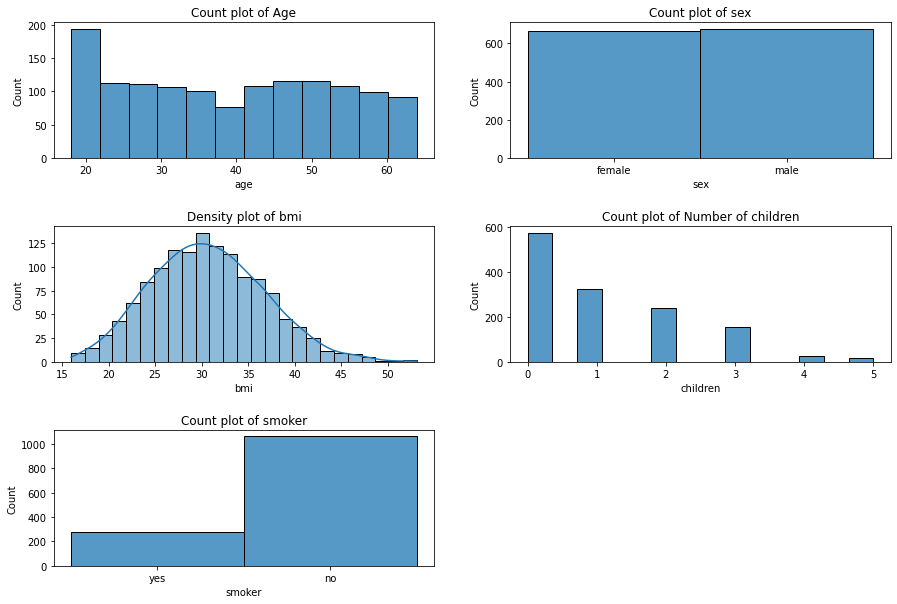

In [217]:
## countplots of predictors

ax= plt.GridSpec(3,2)
ax.update(hspace=0.5)

plt.figure(figsize=(15,10))
plt.subplot(ax[0,0])
sns.histplot(data.age).set(title="Count plot of Age")
plt.subplot(ax[0,1])
sns.histplot(data.sex).set(title="Count plot of sex")
plt.subplot(ax[1,0])
sns.histplot(data.bmi, kde=True).set(title= "Density plot of bmi")
plt.subplot(ax[1,1])
sns.histplot(data.children).set(title="Count plot of Number of children")
plt.subplot(ax[2,0])
sns.histplot(data.smoker).set(title="Count plot of smoker")
plt.show()

        - Age group of 20s has applied the most for Insurance.
        - The Dataset contains equal no. of entries for Male and Female.
        - `bmi` is normally distributed with mean zero.
        - The dataset contains unequal observations in terms of smoker non-smoker.

> **Analyzing feature `Age`**

[Text(0.5, 1.0, 'Mean Charges across all Ages'), Text(0, 0.5, 'Mean Charges')]

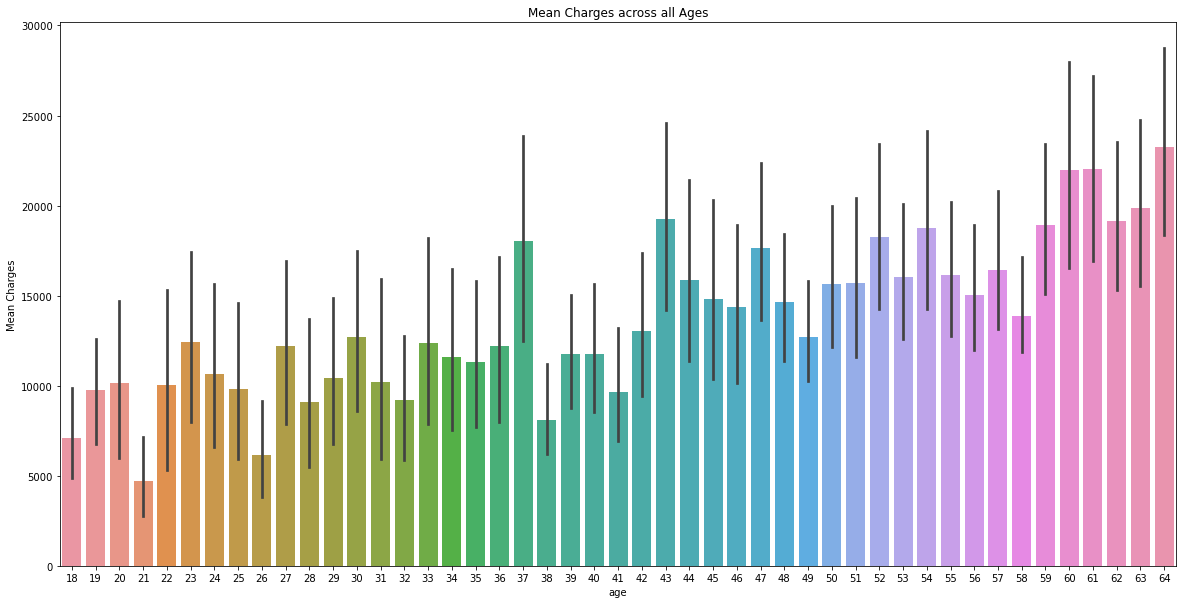

In [218]:
## Mean Charges across all Ages
plt.figure(figsize=(20,10))
sns.barplot(data=data,x="age",y='charges', estimator=np.mean).set(title='Mean Charges across all Ages',ylabel='Mean Charges')

        - Older Age groups tends to pay high Insurance Charges.

[Text(0.5, 1.0, 'Scatterplot- Charges vs Age'), Text(0, 0.5, 'Mean Charges')]

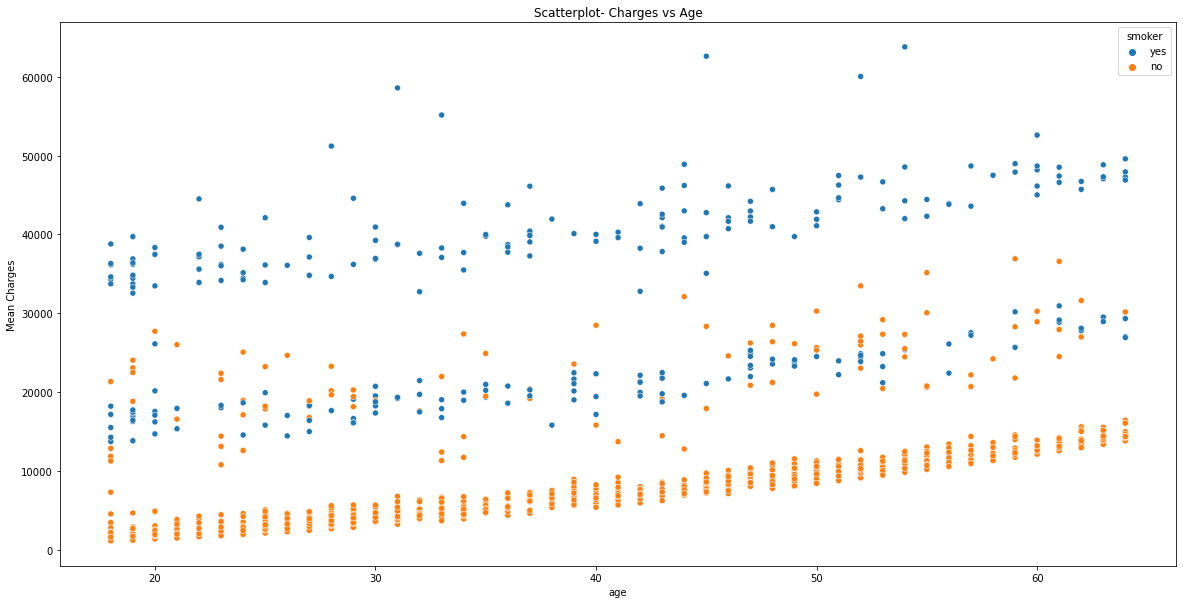

In [219]:
## Charges vs Age + Smoker
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x='age', y='charges', hue='smoker').set(title='Scatterplot- Charges vs Age',ylabel='Mean Charges')

        - 3 Belts of Charges amount are visible - for non-smoker, anyone and smoker

> **Analyzing feature `Sex`**

[Text(0.5, 1.0, 'Distribution of sexes')]

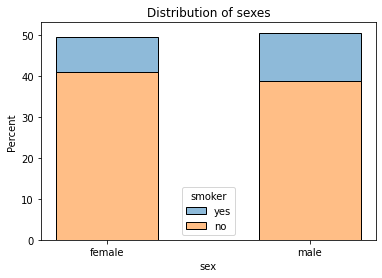

In [225]:
## percentage of sexes in the dataset 
sns.histplot(data = data,x = 'sex', hue='smoker', multiple='stack', stat='percent', alpha=0.5, shrink=.5).set(title="Distribution of sexes")

        - There are more male smokers than female smokers in the dataset

[Text(0.5, 1.0, 'Mean Charges')]

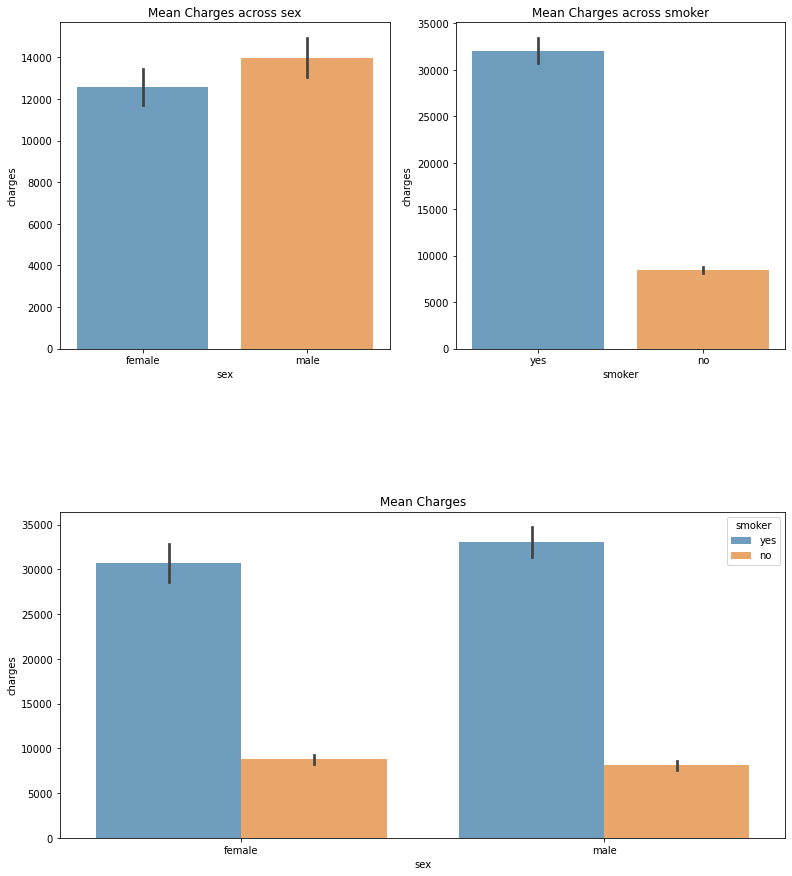

In [228]:
## Smokers, Sexes and Charges
ax= plt.GridSpec(2,2)
ax.update(hspace=0.5)
plt.figure(figsize=(13,15))

plt.subplot(ax[0,0])
sns.barplot(data = data,x = 'sex',y = 'charges', alpha=0.7).set(title="Mean Charges across sex")

plt.subplot(ax[0,1])
sns.barplot(data = data,x = 'smoker',y = 'charges', alpha=0.7).set(title="Mean Charges across smoker")

plt.subplot(ax[1,:])
sns.barplot(data = data,x = 'sex',y = 'charges', hue='smoker', alpha=0.7).set(title="Mean Charges")

        - There is not much difference between mean insurance charges paid by males and females
        - Smokers tends to pay more Insurance Charges than non-smokers

> **Analyzing feature `Region`**

[Text(0.5, 1.0, 'Mean Charges paid from different regions by smokers and non-smokers')]

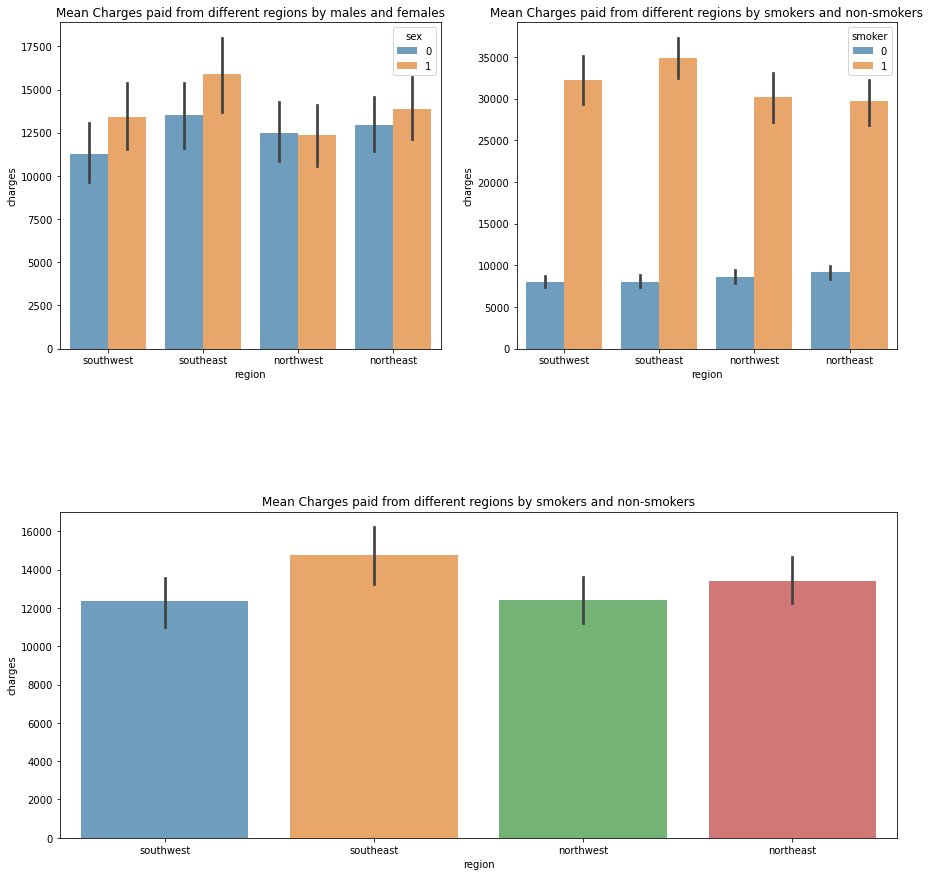

In [128]:
## Regions, Sexes, Smoker and Charges
ax= plt.GridSpec(2,2)
ax.update(hspace=0.5)
plt.figure(figsize=(15,15))

plt.subplot(ax[0,0])
sns.barplot(data=data, x='region', y='charges', hue='sex',  alpha=0.7).set(title="Mean Charges paid from different regions by males and females")

plt.subplot(ax[0,1])
sns.barplot(data=data, x='region', y='charges', hue='smoker',  alpha=0.7).set(title="Mean Charges paid from different regions by smokers and non-smokers")

plt.subplot(ax[1,:])
sns.barplot(data=data, x='region', y='charges',   alpha=0.7).set(title="Mean Charges paid from different regions by smokers and non-smokers")


        - Smokers pays high insurance charges as usual
        - Males in 3/4 of the regions pays higher insurances charges than Females.
        - Southeast region pays more Insurance charges on an average than any other regions.

> **Analyzing feature `BMI`**

[Text(0.5, 1.0, 'charges vs bmi')]

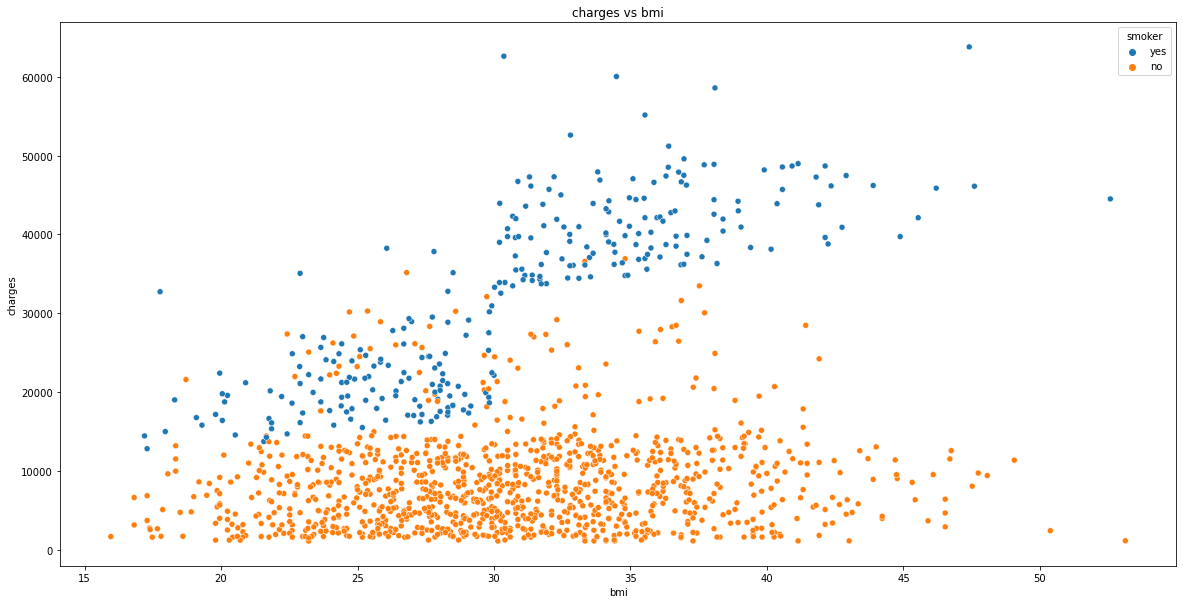

In [299]:
## BMI vs Charges
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x='bmi', y='charges', hue='smoker').set(title="charges vs bmi")

        - Charges Amount is positively correlated with bmi of smokers

> **Analyzing feature `Children`**

Text(0.5, 1.0, 'Pie Chart of no. of children')

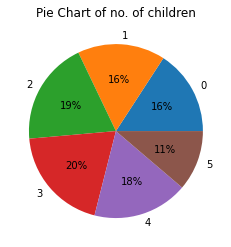

In [30]:
plt.pie(data.groupby(['children']).mean().charges, labels=['0','1','2','3','4','5'], autopct='%.0f%%')
plt.title('Pie Chart of no. of children')

[Text(0.5, 1.0, 'charges vs children')]

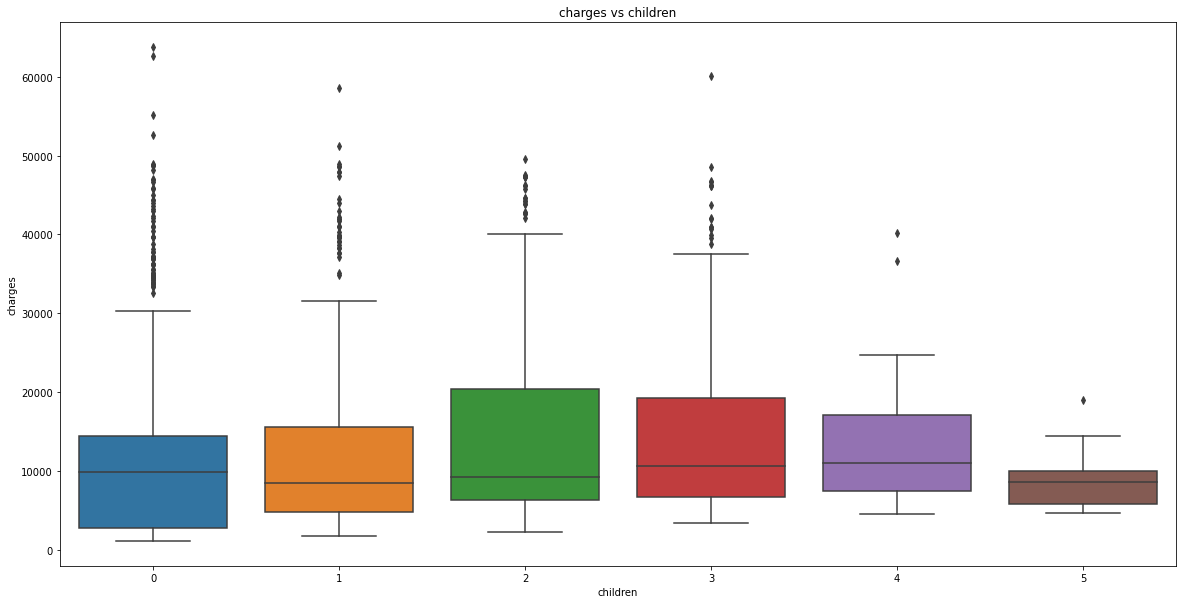

In [298]:
## Distribution of charges across regions
plt.figure(figsize=(20,10))
sns.boxplot(data=data, x='children', y='charges').set(title="charges vs children")

        - Person having 5 children have charges incurred in a very specific range of 0 to 20,000$

> **Analyzing feature `Charges`**

C:\Users\Msc 2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Msc 2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Box plot of charges')]

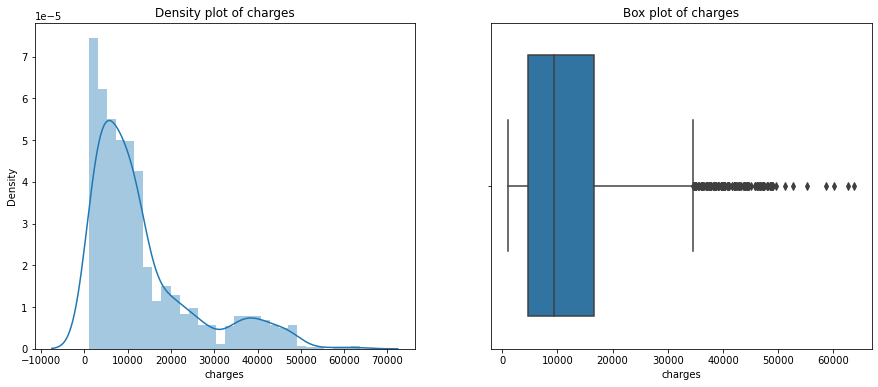

In [300]:
## Distribution of Charges
ax= plt.GridSpec(2,2)
ax.update(hspace=0.5)
plt.figure(figsize=(15,15))

plt.subplot(ax[0,0])
sns.distplot(data.charges).set(title="Density plot of charges")

plt.subplot(ax[0,1])
sns.boxplot(data.charges).set(title="Box plot of charges")


        - Target feature `charges` is positively skewed

> **Correlation Matrix**

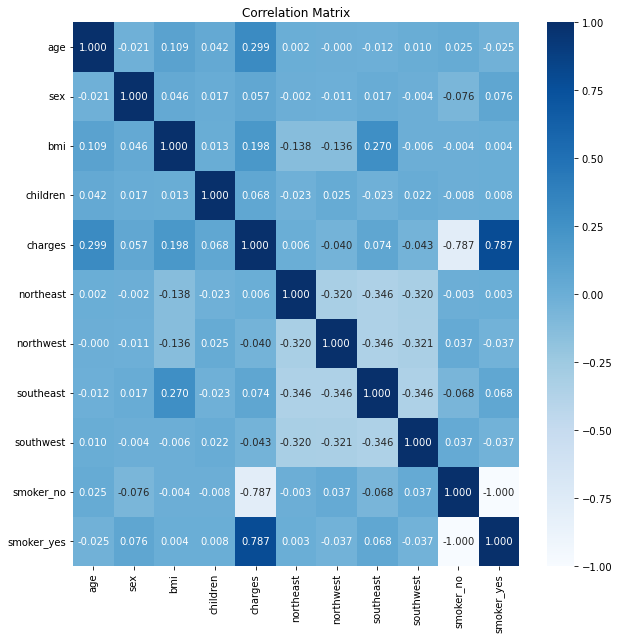

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(proc_data[proc_data.columns.values].corr(), annot=True, fmt='.3f', cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

        - `smoker_yes` and `charges` are highly positively correlated
        - `smoker_no` and `charges` are highly negatively correlated

> **Pair Plot**

Pair Plot


[]

<Figure size 2880x2880 with 0 Axes>

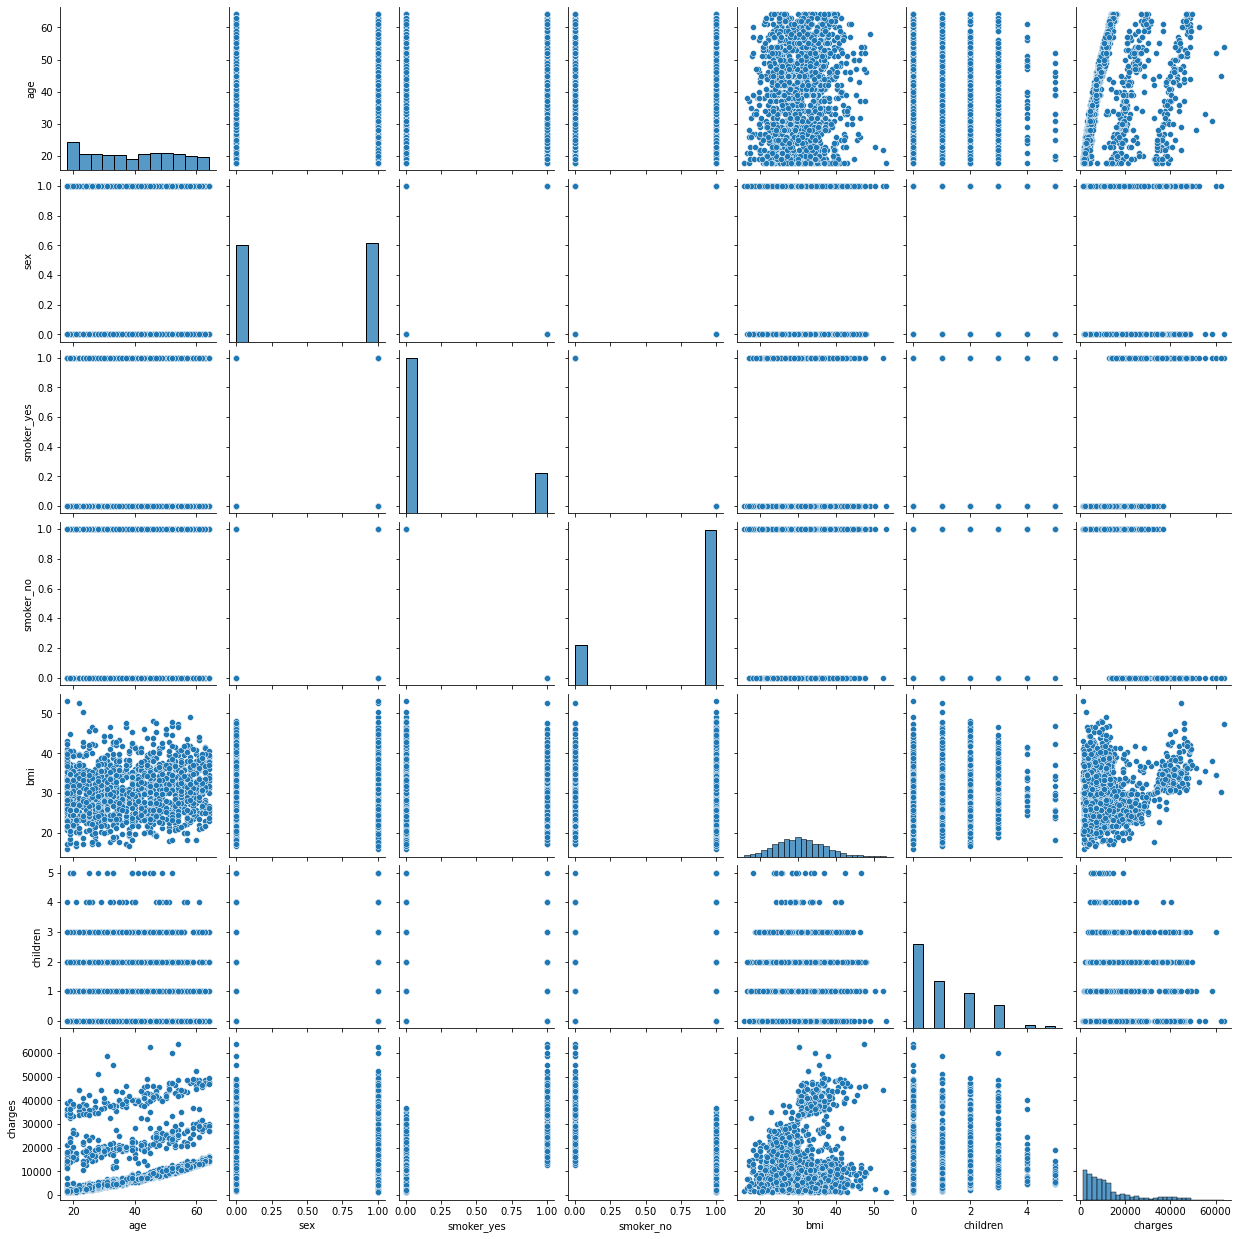

In [260]:
print("Pair Plot")
plt.figure(figsize=(40,40))
sns.pairplot(proc_data[['age', 'sex','smoker_yes','smoker_no', 'bmi', "children", 'charges']])
plt.plot()

        - There is no presense of multicollinearity.
        - `bmi` is normally distributed.

#### Transformations

In [30]:
## importing required libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler

- Scaling `age` between 0 to 1

In [31]:
## Min Max Scaling
scaler = MinMaxScaler()
scaler.fit(proc_data[['age']])
proc_data['age'] = scaler.transform(data[['age']])


* Standardizing `bmi`

In [32]:
## Standard Scaling
scaler = StandardScaler()
scaler.fit(proc_data[['bmi']])
proc_data['bmi'] = scaler.transform(data[['bmi']])

## Modelling

In [11]:
## importing required libraries
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

### Feature Selection

In [33]:
#Initialize variables 
y = proc_data.charges
X = proc_data.drop(columns='charges',axis=1) 

> **Forward Selection**

In [14]:
## Sequential Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(LinearRegression(),
           k_features=X.shape[1],
           forward=True,
           floating=False,  # let only add feature at every step
           scoring = 'r2',
           cv = 0)

sfs.fit(X,y)
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
display(df_SFS_results)

,feature_idx,cv_scores,avg_score,feature_names
1,"(8,)",[0.6197648148218988],0.619765,"(smoker_no,)"
2,"(0, 8)",[0.7214008260577199],0.721401,"(age, smoker_no)"
3,"(0, 2, 8)",[0.7474771588119513],0.747477,"(age, bmi, smoker_no)"
4,"(0, 2, 3, 8)",[0.749694530346479],0.749695,"(age, bmi, children, smoker_no)"
5,"(0, 2, 3, 4, 8)",[0.7504297253198077],0.75043,"(age, bmi, children, northeast, smoker_no)"
6,"(0, 2, 3, 4, 5, 8)",[0.7508791223982644],0.750879,"(age, bmi, children, northeast, northwest, smo..."
7,"(0, 1, 2, 3, 4, 5, 8)",[0.7509082786391111],0.750908,"(age, sex, bmi, children, northeast, northwest..."
8,"(0, 1, 2, 3, 4, 5, 6, 8)",[0.7509130345985207],0.750913,"(age, sex, bmi, children, northeast, northwest..."
9,"(0, 1, 2, 3, 4, 5, 6, 8, 9)",[0.7509130345985207],0.750913,"(age, sex, bmi, children, northeast, northwest..."
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",[0.7509130345985207],0.750913,"(age, sex, bmi, children, northeast, northwest..."


In [15]:
print('Top features enough to reach maximum score:')
df_SFS_results.iloc[7,3]

Top features enough to reach maximum score:


('age',
 'sex',
 'bmi',
 'children',
 'northeast',
 'northwest',
 'southeast',
 'smoker_no')

         - Using Forward Selection Method, top 8 predictors achieved R2 score of 0.750913 which remained approximately same even after considering more features. 

> **Backward Selection**

In [16]:
from sklearn.feature_selection import RFE

model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=X.shape[1])
fit = rfe.fit(X, y)

df_RFE_results = []
for i in range(X.shape[1]):
    df_RFE_results.append(
        {      
            'Feature_names': X.columns[i],
            'Selected':  rfe.support_[i],
            'RFE_ranking':  rfe.ranking_[i],
        }
    )
    
df_RFE_results = pd.DataFrame(df_RFE_results)
df_RFE_results.index.name='Columns'
df_RFE_results

,Feature_names,Selected,RFE_ranking
Columns,,,
0,age,True,1
1,sex,True,1
2,bmi,True,1
3,children,True,1
4,northeast,True,1
5,northwest,True,1
6,southeast,True,1
7,southwest,True,1
8,smoker_no,True,1


        - Backward Selection method could not ignore any of the predictors.

> **Step-wise Selection**

In [17]:
sfs = SFS(LinearRegression(),
           k_features=X.shape[1],
           forward=True,
           floating=True,  # let feature drop or add at every step
           scoring = 'r2',
           cv = 0)

sfs.fit(X,y)
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
display(df_SFS_results)

,feature_idx,cv_scores,avg_score,feature_names
1,"(8,)",[0.6197648148218988],0.619765,"(smoker_no,)"
2,"(0, 8)",[0.7214008260577199],0.721401,"(age, smoker_no)"
3,"(0, 2, 8)",[0.7474771588119513],0.747477,"(age, bmi, smoker_no)"
4,"(0, 2, 3, 8)",[0.749694530346479],0.749695,"(age, bmi, children, smoker_no)"
5,"(0, 2, 3, 4, 8)",[0.7504297253198077],0.75043,"(age, bmi, children, northeast, smoker_no)"
6,"(0, 2, 3, 4, 5, 8)",[0.7508791223982644],0.750879,"(age, bmi, children, northeast, northwest, smo..."
7,"(0, 1, 2, 3, 4, 5, 8)",[0.7509082786391111],0.750908,"(age, sex, bmi, children, northeast, northwest..."
8,"(0, 1, 2, 3, 4, 5, 6, 8)",[0.7509130345985207],0.750913,"(age, sex, bmi, children, northeast, northwest..."
9,"(0, 1, 2, 3, 4, 5, 6, 8, 9)",[0.7509130345985207],0.750913,"(age, sex, bmi, children, northeast, northwest..."
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",[0.7509130345985207],0.750913,"(age, sex, bmi, children, northeast, northwest..."


In [18]:
print('Top features enough to reach maximum score:')
df_SFS_results.iloc[7,3]

Top features enough to reach maximum score:


('age',
 'sex',
 'bmi',
 'children',
 'northeast',
 'northwest',
 'southeast',
 'smoker_no')

        - Step wise Selection gave similar results to forward selection.

C:\Users\Msc 2\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Msc 2\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


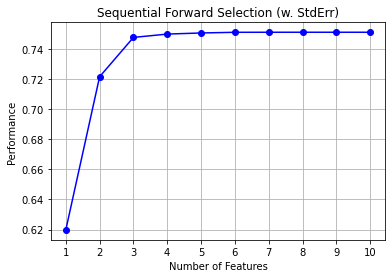

In [19]:
## Plotting Step-wise feature selection 

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

* Final Features selected - `age`, `sex`, `bmi`, `children`,`northeast`, `northwest`, `southeast`, `smoker_no`

### Linear Regression Model

In [34]:
## Train-Test split
from sklearn.model_selection import train_test_split

X = X.drop(columns=['smoker_yes', 'southwest'])

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

print(Xtrain.shape)
print(Xtrain.columns)
print(ytrain.shape)
print(Xtest.shape)

(1070, 8)
Index(['age', 'sex', 'bmi', 'children', 'northeast', 'northwest', 'southeast',
       'smoker_no'],
      dtype='object')
(1070,)
(268, 8)


In [35]:
## Fitting Model
model = LinearRegression() 
model.fit(Xtrain,ytrain)  
model

LinearRegression()

In [36]:
## Model Coefficients
print(model.coef_)
print(model.intercept_)
print("Model:")
print(f"Charges ~{model.intercept_} +{model.coef_[0]}age + {model.coef_[1]}bmi + {model.coef_[2]}children + {model.coef_[3]}northeast + {model.coef_[4]}northwest + {model.coef_[5]}smoker_no + {model.coef_[6]}smoker_yes")

[ 11861.18158244   -334.44025944   1907.47826356    455.47280237
    683.98381553    471.58677019   -170.5153453  -24056.65646451]
26378.09523015891
Model:
Charges ~26378.09523015891 +11861.181582442341age + -334.44025944106033bmi + 1907.4782635550894children + 455.47280237369915northeast + 683.9838155345153northwest + 471.58677019433605smoker_no + -170.51534530476334smoker_yes


Model:  
    `Charges` **~** 24927.22 +12066.79`age` + -123.73`bmi` + 1933.28`children` + 568.99`northeast` + 994.27`northwest` + 1044.22`smoker_no` + 628.29`smoker_yes`

#### Evaluation

In [37]:
## Model Scores
def getScores(Xtrain, ytrain, Xtest, ytest, model):
    '''This function returns the RSS, R squared and Adjusted R squared of the model for train and test dataset as a Pandas DataFrame.'''
    train_RSS = mean_squared_error(ytrain, model.predict(Xtrain))*len(ytrain)
    test_RSS = mean_squared_error(ytest, model.predict(Xtest))*len(ytest)
    train_R_Sq = model.score(Xtrain, ytrain)
    test_R_Sq = model.score(Xtest, ytest)
    train_Adj_R = 1 - ( 1 - train_R_Sq)*(len(ytrain) - 1)/(len(ytrain) - Xtrain.shape[1]-1)
    test_Adj_R = 1 - ( 1 - test_R_Sq)*(len(ytest) - 1)/(len(ytest) - Xtest.shape[1]-1)
    df = pd.DataFrame({'RSS': [train_RSS, test_RSS],'R Squared': [train_R_Sq, test_R_Sq],'Adjusted R Squared': [train_Adj_R, test_Adj_R]},  index=['train', 'test'])
    return df

scores = getScores(Xtrain, ytrain, Xtest, ytest, model)
print("Model Performance:")
display(scores)

Model Performance:


,RSS,R Squared,Adjusted R Squared
train,3.919284e+10,0.752058,0.750189
test,9.711995e+09,0.744358,0.736462


### Regularization

- Lasso Regression

In [38]:
from sklearn import linear_model
regL1 = linear_model.Lasso(alpha=0.1)
regL1.fit(Xtrain,ytrain)
regL1

Lasso(alpha=0.1)

In [39]:
scores = getScores(Xtrain, ytrain, Xtest, ytest, regL1)
print("Model Performance:")
display(scores)

Model Performance:


,RSS,R Squared,Adjusted R Squared
train,3.919284e+10,0.752058,0.750189
test,9.711972e+09,0.744359,0.736463


- Ridge Regression

In [44]:
from sklearn import linear_model
regL2 = linear_model.Ridge(alpha=0.5)
regL2.fit(Xtrain,ytrain)
regL2

Ridge(alpha=0.5)

In [45]:
scores = getScores(Xtrain, ytrain, Xtest, ytest, regL2)
print("Model Performance:")
display(scores)

Model Performance:


,RSS,R Squared,Adjusted R Squared
train,3.919406e+10,0.752051,0.750181
test,9.705774e+09,0.744522,0.736631
